In [121]:
!pip3 install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Visualization

In [191]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

In [192]:
df = pd.read_csv("https://raw.githubusercontent.com/Kande2011/TimeSeriesAnalysisOfCOVID19/data_preprocessing/DataSets/us-counties-2020.csv")
df.head()



,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


In [193]:

# df=df1.append(df2)
# df.head()

In [194]:
# Remove not usefull columns
df = df.drop(['geoid', 'county','cases_avg_per_100k','cases_avg_per_100k','deaths_avg_per_100k'], axis=1)

In [195]:
# Simplify column names
df.columns = ['date',  'state', 'cases', 'cases_avg', 'deaths', 'deaths_avg']
targets = ['cases_avg']
features = [feature for feature in df.columns if feature not in targets]
df.head()

,date,state,cases,cases_avg,deaths,deaths_avg
0,2020-01-21,Washington,1,0.14,0,0.0
1,2020-01-22,Washington,0,0.14,0,0.0
2,2020-01-23,Washington,0,0.14,0,0.0
3,2020-01-24,Washington,0,0.14,0,0.0
4,2020-01-24,Illinois,1,0.14,0,0.0


In [196]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,state,cases,cases_avg,deaths,deaths_avg
0,2020-01-21 00:00:00,Washington,1,0.140000,0,0.000000
1,2020-01-22 00:00:00,Washington,0,0.140000,0,0.000000
2,2020-01-23 00:00:00,Washington,0,0.140000,0,0.000000
3,2020-01-24 00:00:00,Washington,0,0.140000,0,0.000000
4,2020-01-24 00:00:00,Illinois,1,0.140000,0,0.000000


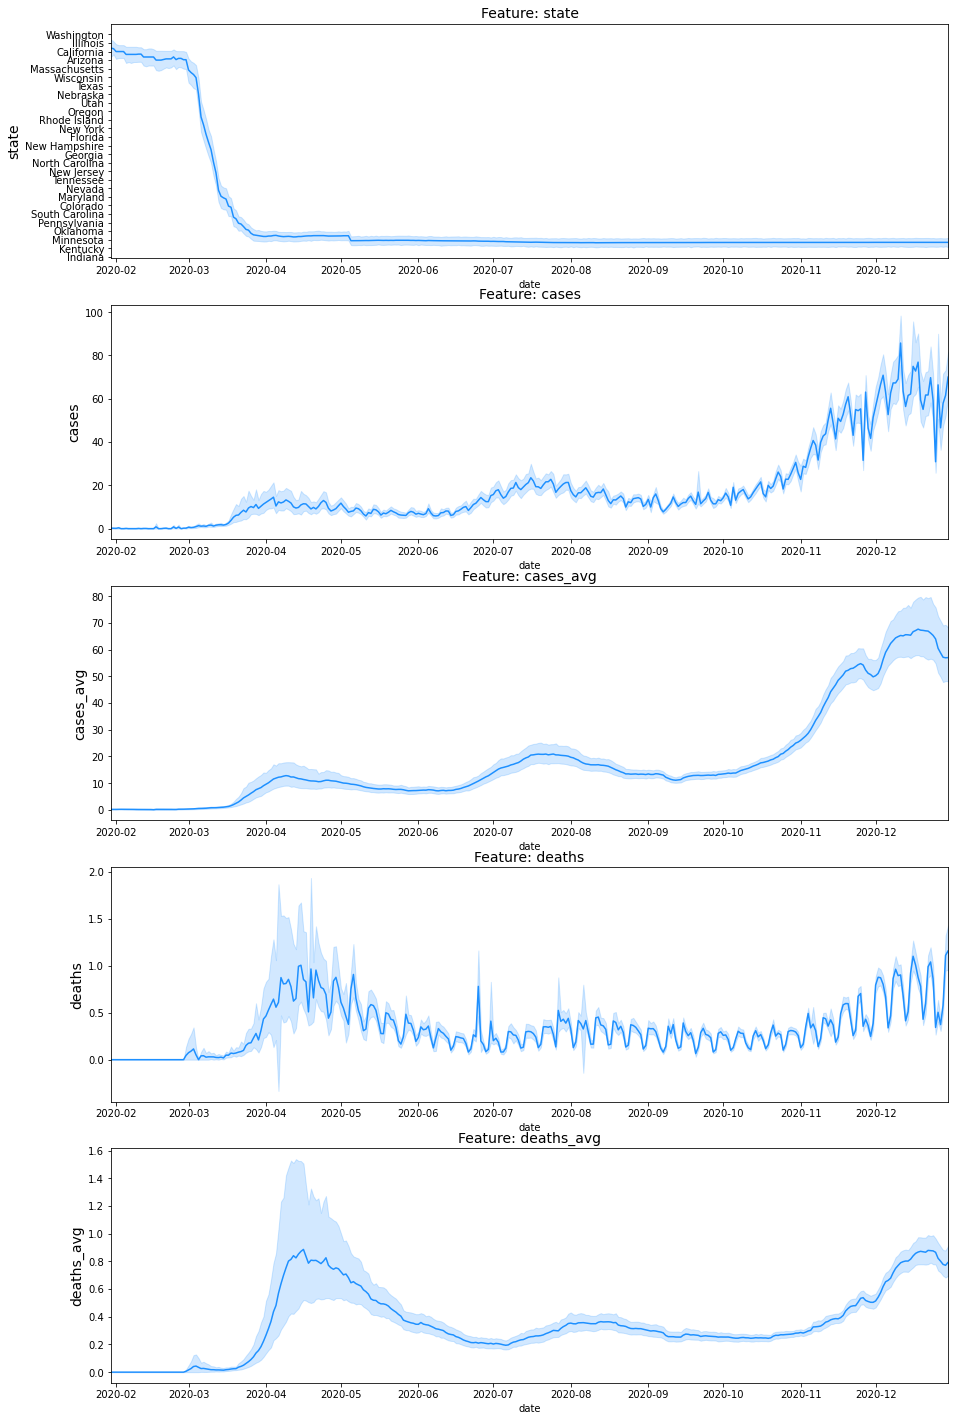

In [197]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2020, 1, 30), date(2020, 12, 30)])    

In [198]:
df = df.sort_values(by='date')

# Check time intervals
df['delta'] = df['date'] - df['date'].shift(1)

df[['date', 'delta']].head()

,date,delta
0,2020-01-21,NaT
1,2020-01-22,1 days
2,2020-01-23,1 days
3,2020-01-24,1 days
4,2020-01-24,0 days


In [199]:
df['delta'].sum(), df['delta'].count()

(Timedelta('345 days 00:00:00'), 889997)

# Date Preprocessing

## Handle misssing data

In [200]:
df = df.drop('delta', axis=1)
df.isna().sum()

date          0
state         0
cases         0
cases_avg     0
deaths        0
deaths_avg    0
dtype: int64

(737545.0, 737789.0)

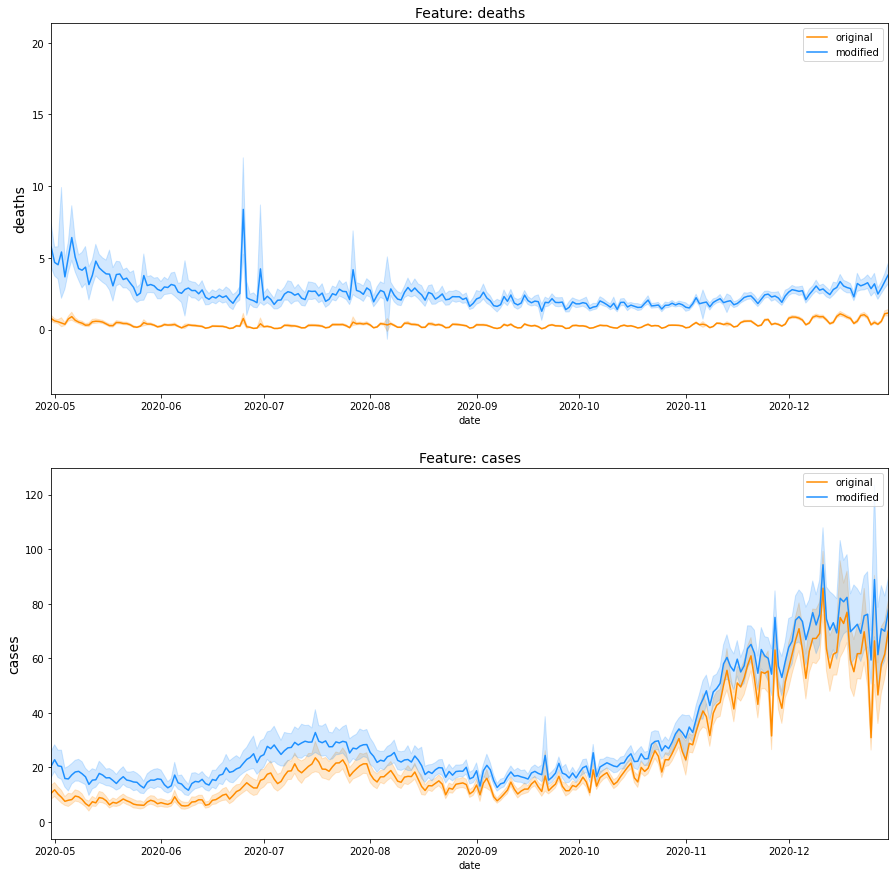

In [201]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

old_deaths = df['deaths'].copy()
df['deaths'] = df['deaths'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_deaths, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['deaths'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: deaths', fontsize=14)
ax[0].set_ylabel(ylabel='deaths', fontsize=14)
ax[0].set_xlim([date(2020, 4, 30), date(2020, 12, 30)])

old_cases = df['cases'].copy()
df['cases'] = df['cases'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_cases, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=df['date'], y=df['cases'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: cases', fontsize=14)
ax[1].set_ylabel(ylabel='cases', fontsize=14)
ax[1].set_xlim([date(2020, 4, 30), date(2020, 12, 30)])

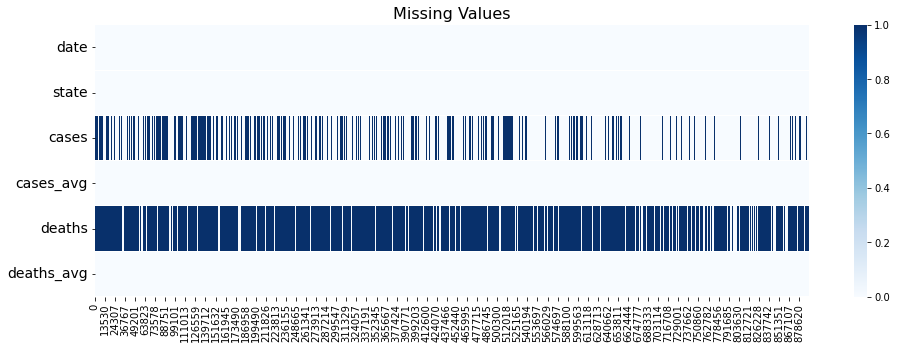

In [202]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

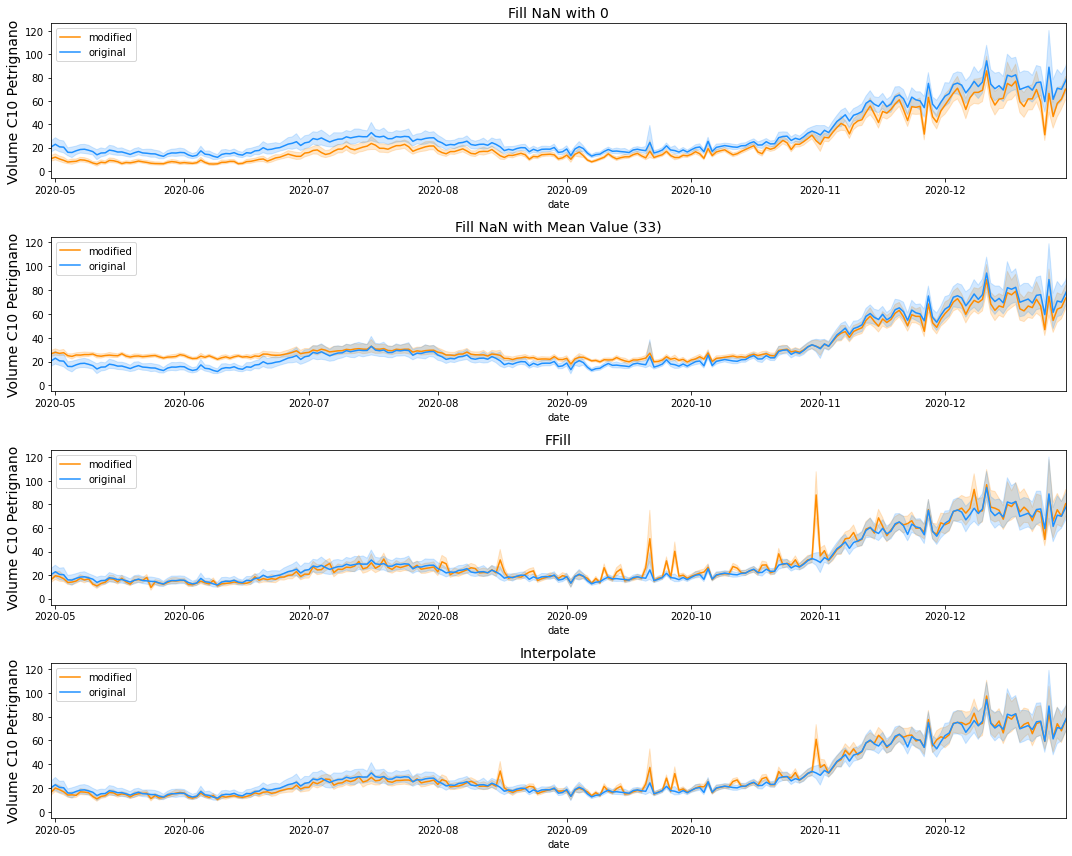

In [203]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['cases'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['cases'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_cases = df['cases'].mean()
sns.lineplot(x=df['date'], y=df['cases'].fillna(mean_cases), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['cases'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_cases:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['cases'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['cases'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['cases'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['cases'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2020, 4, 30), date(2020, 12, 30)])
    
plt.tight_layout()
plt.show()

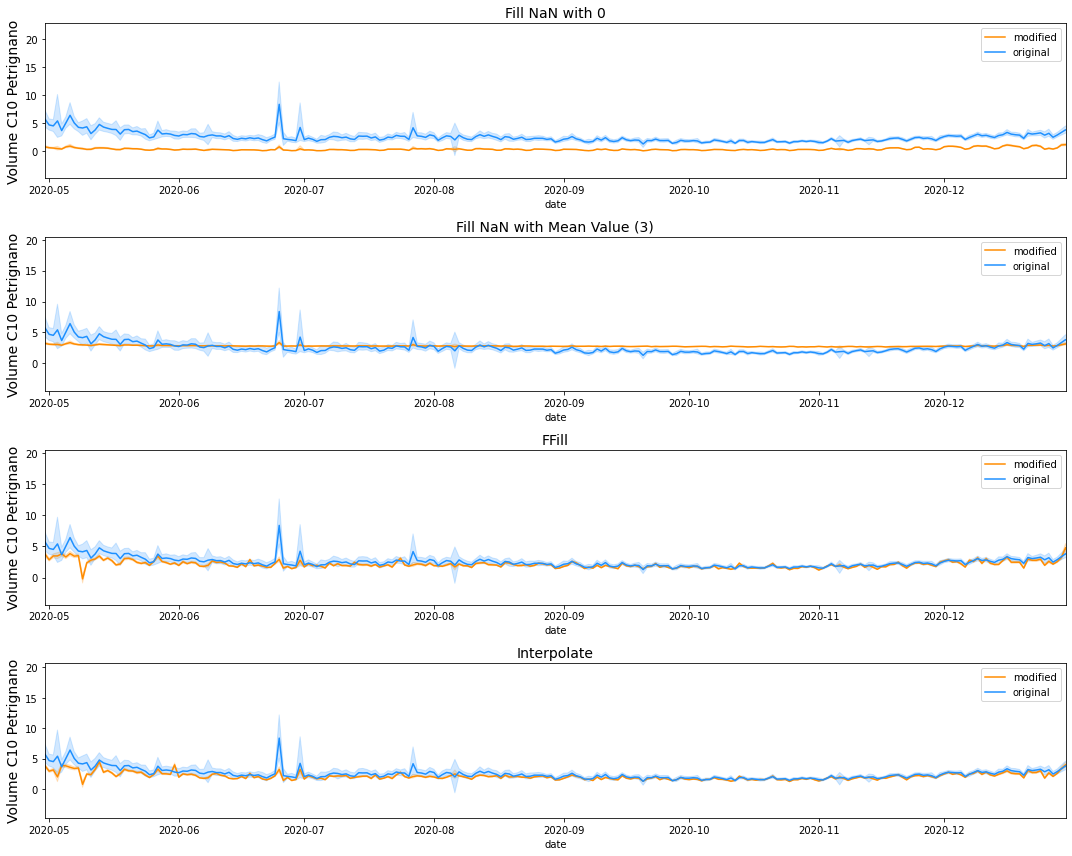

In [204]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['deaths'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['deaths'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

mean_deaths = df['deaths'].mean()
sns.lineplot(x=df['date'], y=df['deaths'].fillna(mean_deaths), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['deaths'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_deaths:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['deaths'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['deaths'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['date'], y=df['deaths'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['deaths'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

for i in range(4):
    ax[i].set_xlim([date(2020, 4, 30), date(2020, 12, 30)])
    
plt.tight_layout()
plt.show()

In [205]:
df['deaths'] = df['deaths'].interpolate()
df['cases'] = df['cases'].interpolate()


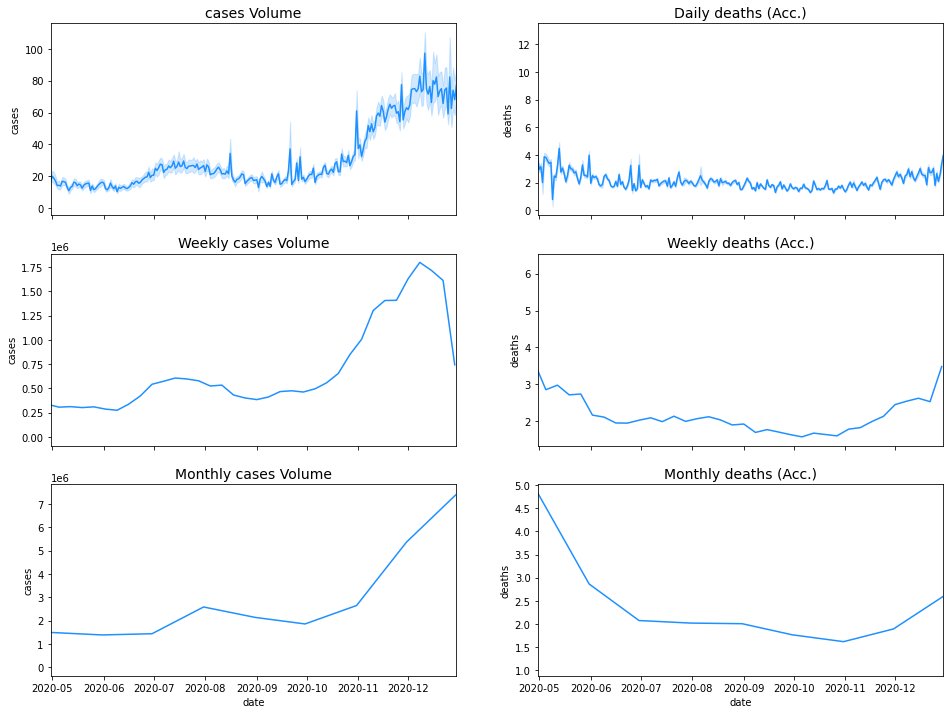

In [206]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16,12))

sns.lineplot(df['date'], df['cases'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('cases Volume', fontsize=14)

resampled_df = df[['date','cases']].resample('7D', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['cases'], color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly cases Volume', fontsize=14)

resampled_df = df[['date','cases']].resample('M', on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['cases'], color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly cases Volume', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2020, 4, 30), date(2020, 12, 30)])

sns.lineplot(df['date'], df['deaths'], color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily deaths (Acc.)', fontsize=14)

resampled_df = df[['date','deaths']].resample('7D', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['deaths'], color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly deaths (Acc.)', fontsize=14)

resampled_df = df[['date','deaths']].resample('M', on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'], resampled_df['deaths'], color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly deaths (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2020, 4, 30), date(2020, 12, 30)])
plt.show()

## Data Resampling

In [207]:
# As we can see, downsample to weekly could smooth the data and hgelp with analysis
downsample = df[['date', 'cases', 'cases_avg', 'deaths', 'deaths_avg']].resample('7D', on='date').mean().reset_index(drop=False)

df = downsample.copy()

## Stationarity

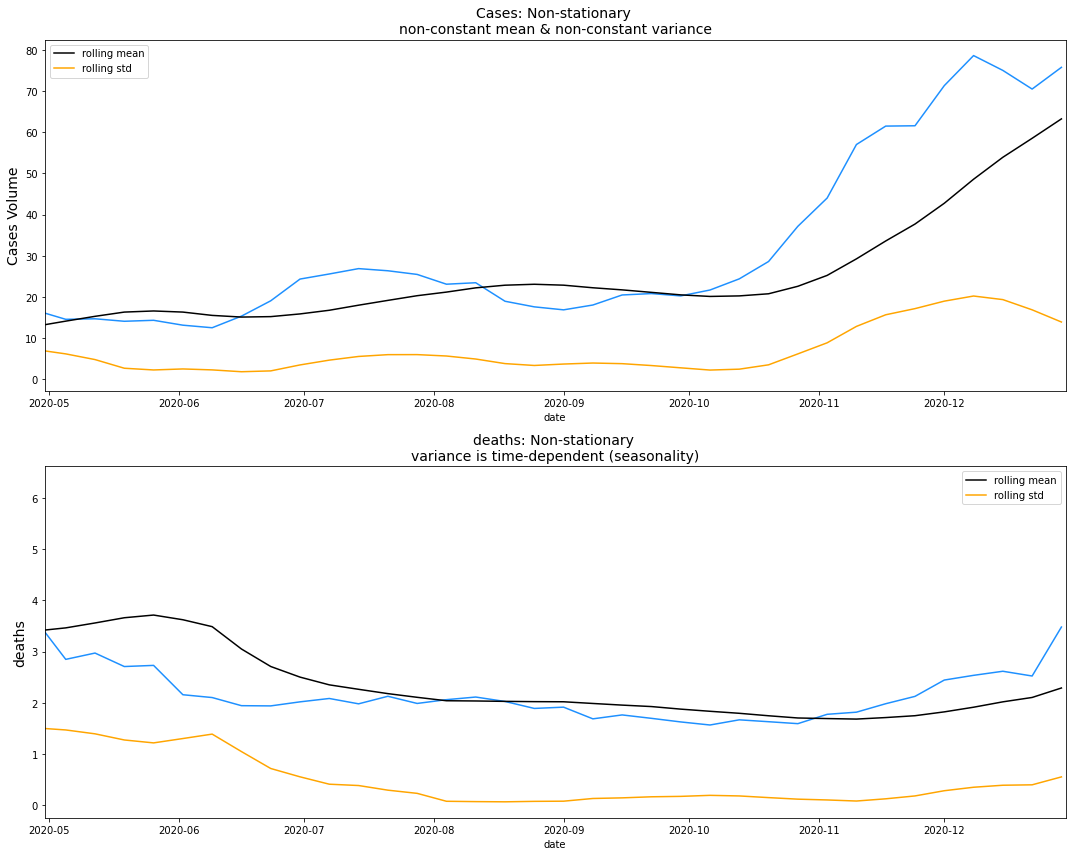

In [208]:
rolling_window = 10
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['date'], y=df['cases'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['cases'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['cases'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Cases: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Cases Volume', fontsize=14)
ax[0].set_xlim([date(2020, 4, 30), date(2020, 12, 30)])

sns.lineplot(x=df['date'], y=df['deaths'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=df['date'], y=df['deaths'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=df['date'], y=df['deaths'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('deaths: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='deaths', fontsize=14)
ax[1].set_xlim([date(2020, 4, 30), date(2020, 12, 30)])

plt.tight_layout()
plt.show()

In [209]:
df['deaths'] = df['deaths'].replace(np.inf, 0)
df['deaths'] = df['deaths'].replace(np.nan, 0)
df['deaths'] = df['deaths'].replace(-np.inf, 0)

df['cases'] = df['cases'].replace(np.inf, 0)
df['cases'] = df['cases'].replace(np.nan, 0)

### ADF

In [210]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['cases'].values)
result

(-0.22320688946372993,
 0.9356982905141449,
 3,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 204.05834603879157)

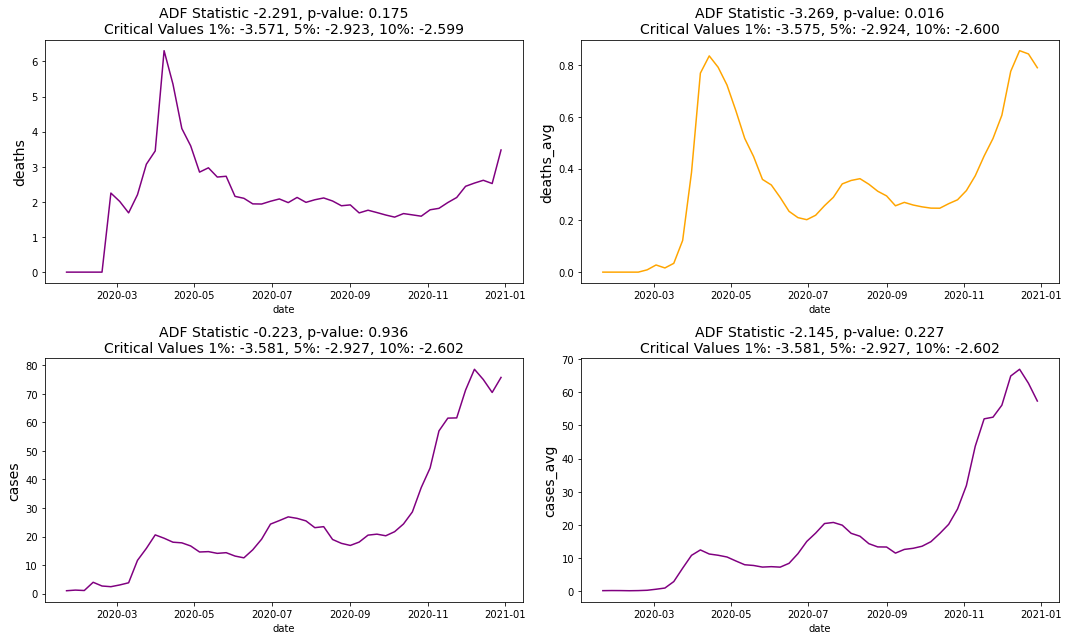

In [213]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df['deaths'].values, 'deaths', ax[0, 0])
visualize_adfuller_results(df['cases'].values, 'cases', ax[1, 0])
visualize_adfuller_results(df['deaths_avg'].values, 'deaths_avg', ax[0, 1])
visualize_adfuller_results(df['cases_avg'].values, 'cases_avg', ax[1, 1])
#f.delaxes(ax[1, 1])
plt.tight_layout()
plt.show()


### Transforming

In [214]:
df['deaths'] = df['deaths'].replace(-np.inf, 0)

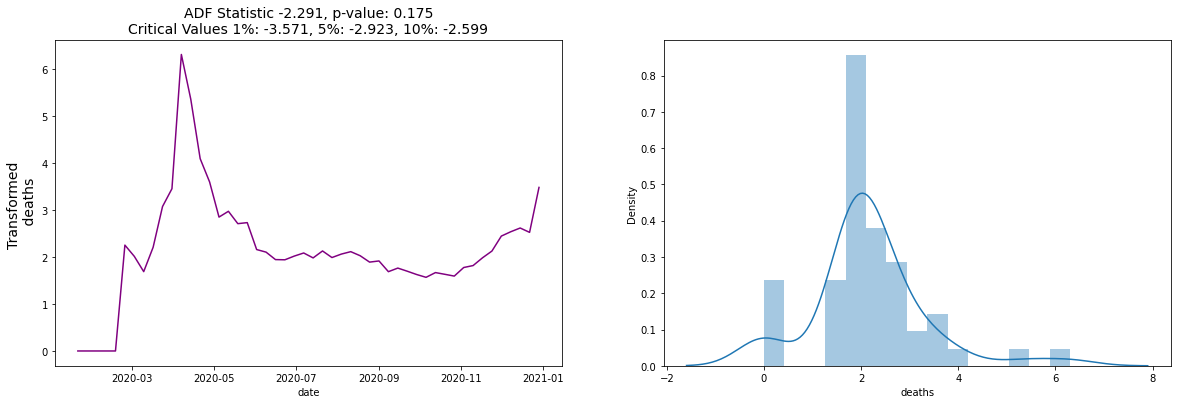

In [215]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['deaths'], 'Transformed \n deaths', ax[0])

sns.distplot(df['deaths'], ax=ax[1])

### Differencing

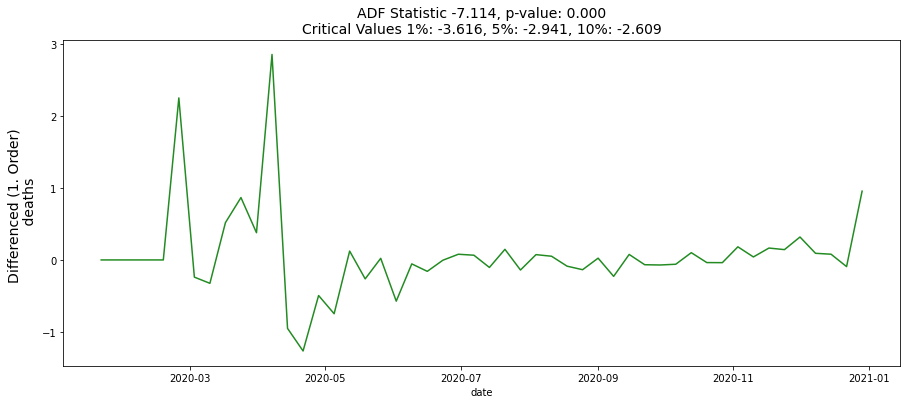

In [216]:
# First Order Differencing
ts_diff = np.diff(df['deaths'])
df['deaths'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['deaths'], 'Differenced (1. Order) \n deaths', ax)

In [217]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2020-01-21,2020,1,21,21,4,1,1
1,2020-01-28,2020,1,28,28,5,1,1
2,2020-02-04,2020,2,4,35,6,1,1
3,2020-02-11,2020,2,11,42,7,1,1
4,2020-02-18,2020,2,18,49,8,1,1


# Feature engineering

In [218]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['day_of_year'] = pd.DatetimeIndex(df['date']).dayofyear
df['week_of_year'] = pd.DatetimeIndex(df['date']).weekofyear
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['season'] = df['month'] % 12 // 3 + 1

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,date,year,month,day,day_of_year,week_of_year,quarter,season
0,2020-01-21,2020,1,21,21,4,1,1
1,2020-01-28,2020,1,28,28,5,1,1
2,2020-02-04,2020,2,4,35,6,1,1
3,2020-02-11,2020,2,11,42,7,1,1
4,2020-02-18,2020,2,18,49,8,1,1


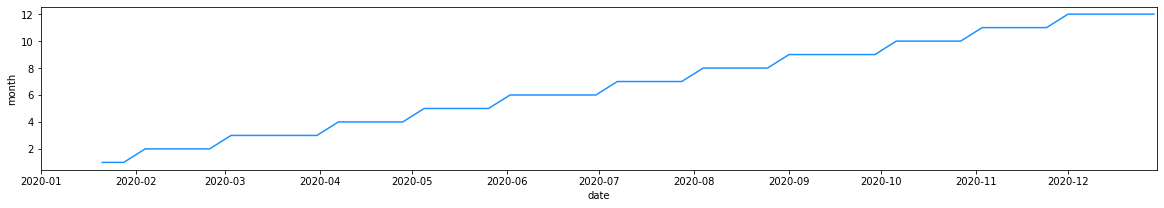

In [219]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
ax.set_xlim([date(2020, 1, 1), date(2020, 12, 30)])
plt.show()

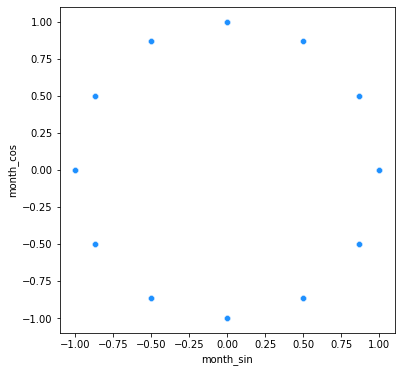

In [220]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

In [221]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'deaths', 'cases', 'deaths_avg', 
    'cases_avg'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=25, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

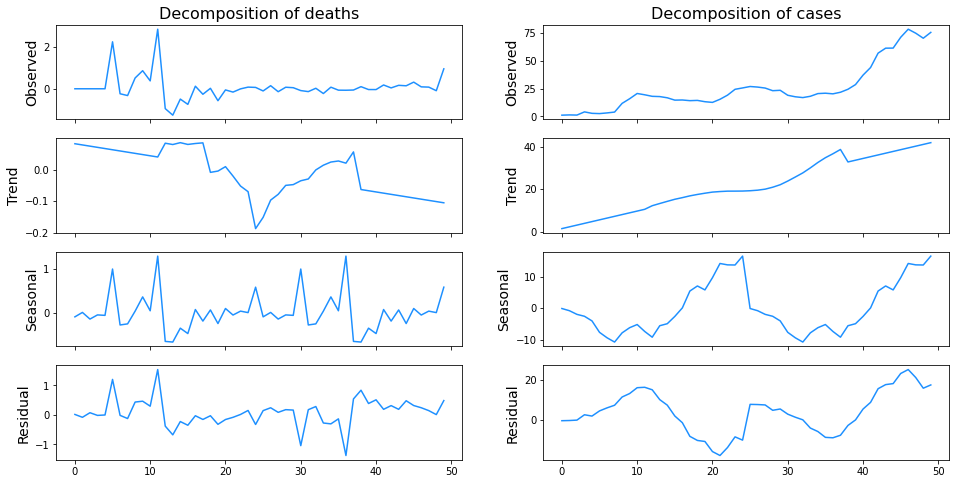

In [222]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['deaths', 'cases']):
    
    res = seasonal_decompose(df[column], freq=25, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

In [223]:
weeks_in_month = 4

for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2 * weeks_in_month)
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1 * weeks_in_month)
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1 * weeks_in_month)
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * weeks_in_month)
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * weeks_in_month)

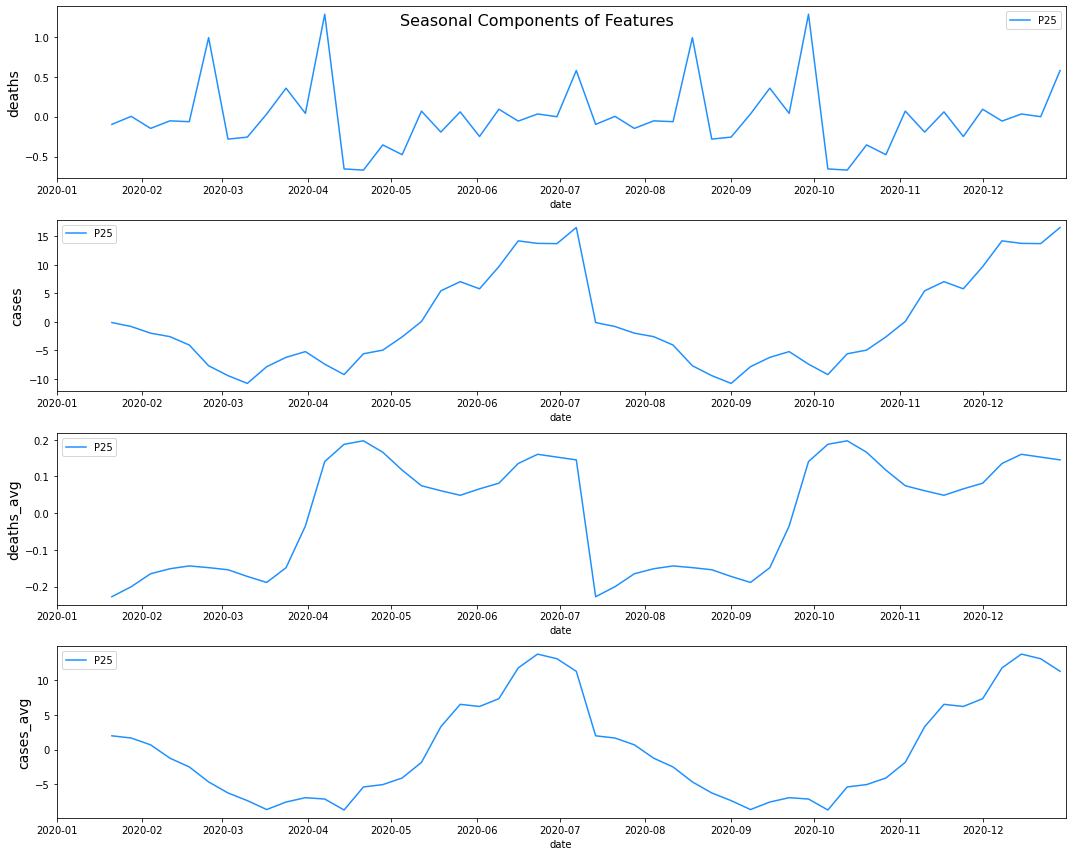

In [224]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(core_columns):
    sns.lineplot(x=df['date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2020, 1, 1), date(2020, 12, 31)])
    
plt.tight_layout()
plt.show()

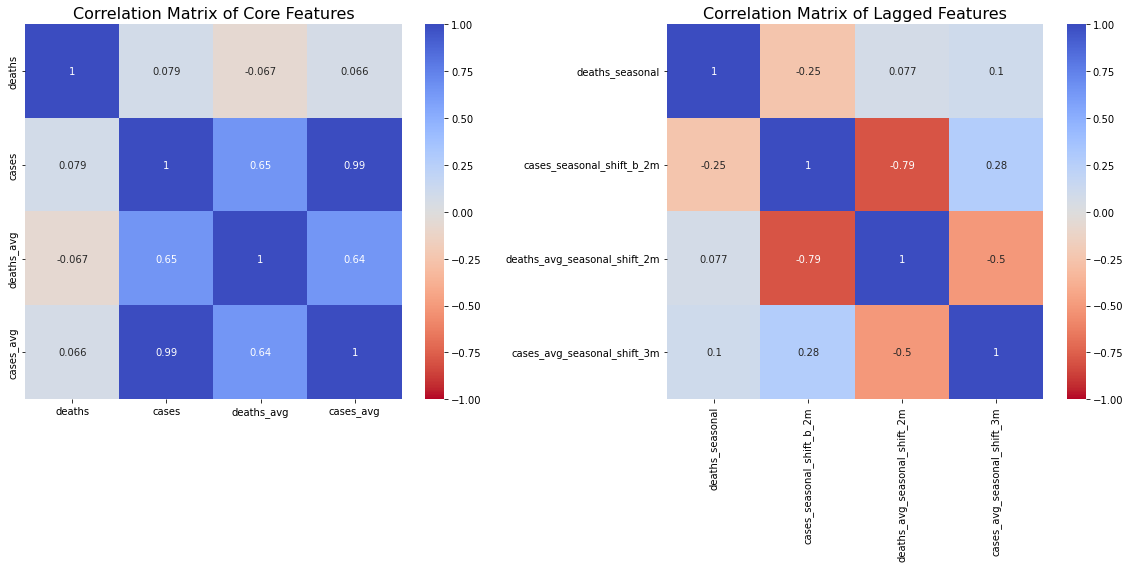

In [225]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

corrmat = df[core_columns].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)

shifted_cols = [
    'deaths_seasonal',         
    'cases_seasonal_shift_b_2m',
    'deaths_avg_seasonal_shift_2m', 
    'cases_avg_seasonal_shift_3m'
]
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()

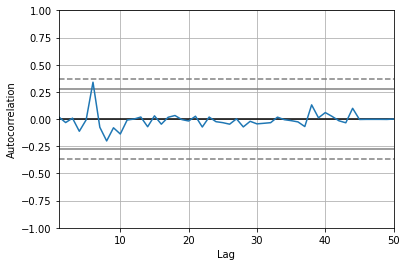

In [226]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['deaths'])
plt.show()

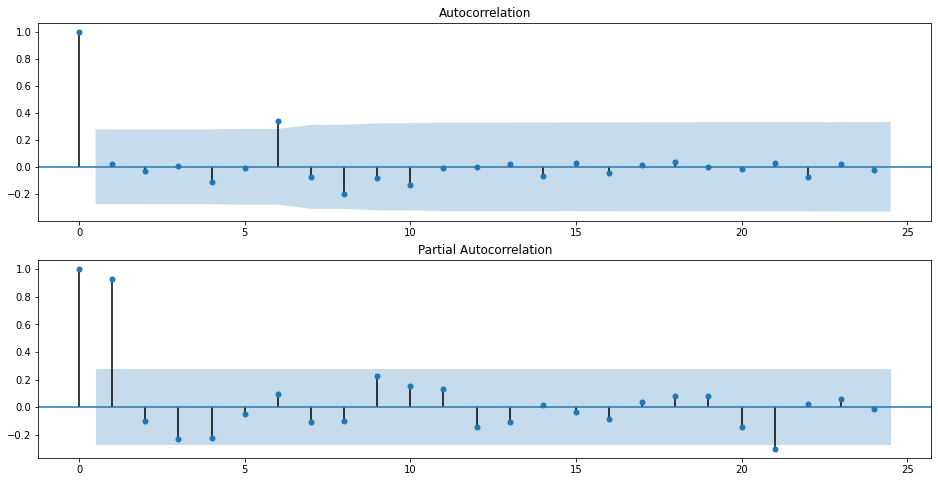

In [227]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df['deaths'], lags=24, ax=ax[0])
plot_pacf(df['cases'], lags=24, ax=ax[1])

plt.show()

# ARIMA

In [229]:

test_df = pd.read_csv("https://raw.githubusercontent.com/Kande2011/TimeSeriesAnalysisOfCOVID19/data_preprocessing/DataSets/us-counties-2021.csv")
test_df.head()

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2021-01-01,USA-72999,Unknown,Puerto Rico,-17,35.29,NaN,0,0.0,NaN
1,2021-01-01,USA-72153,Yauco,Puerto Rico,4,3.00,8.86,0,0.0,0.0
2,2021-01-01,USA-72151,Yabucoa,Puerto Rico,10,7.29,22.66,0,0.0,0.0
3,2021-01-01,USA-72149,Villalba,Puerto Rico,8,2.43,11.31,0,0.0,0.0
4,2021-01-01,USA-72147,Vieques,Puerto Rico,0,1.00,11.96,0,0.0,0.0


In [230]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df['date']
y = df['deaths']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

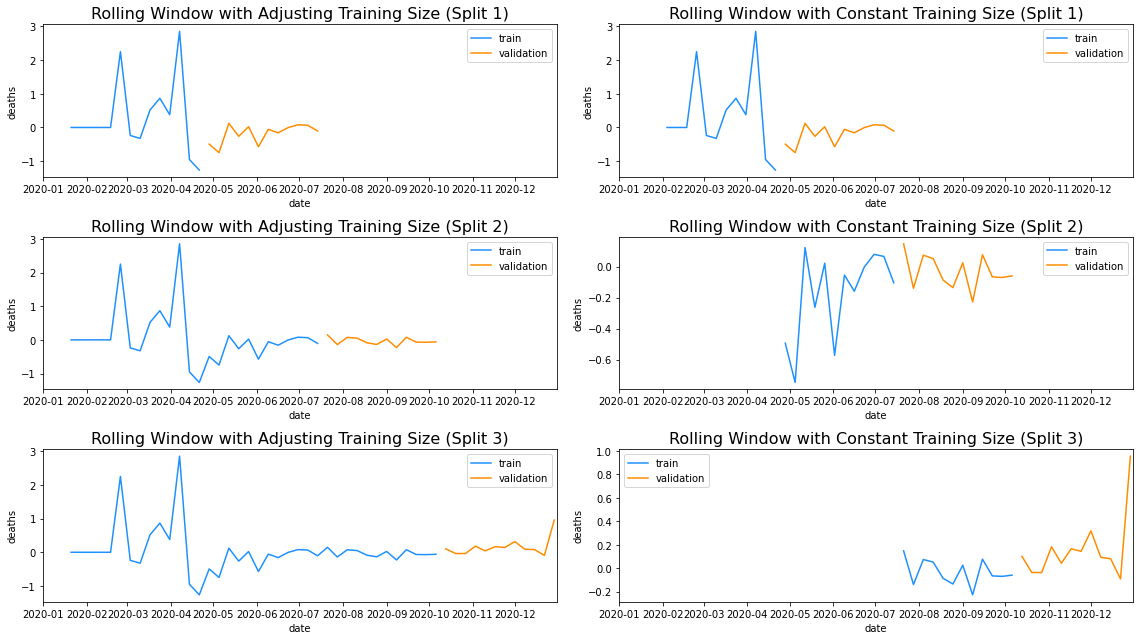

In [231]:
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(
        x=X_train, 
        y=y_train, 
        ax=ax[i,0], 
        color='dodgerblue', 
        label='train'
    )
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))], 
        ax=ax[i,1], 
        color='dodgerblue', 
        label='train'
    )

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2020, 1, 1), date(2020, 12, 31)])
    ax[i, 1].set_xlim([date(2020, 1, 1), date(2020, 12, 31)])
    
plt.tight_layout()
plt.show()

In [241]:
train_size = 25
test_size = len(df) - train_size

univariate_df = df[['date', 'cases']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

25 25


In [234]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [235]:
!pip install localpip 
!localpip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/bin/localpip", line 5, in <module>
    from localpip.__main__ import main
  File "/usr/local/lib/python3.7/dist-packages/localpip/__main__.py", line 5, in <module>
    from ctypes import Structure, byref, windll
ImportError: cannot import name 'windll' from 'ctypes' (/usr/lib/python3.7/ctypes/__init__.py)


In [236]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [237]:
!pip uninstall pystan
!pip install pystan~=2.14
!pip install fbprophet

Found existing installation: pystan 2.19.1.1
Uninstalling pystan-2.19.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pystan-2.19.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pystan/*
Proceed (y/n)? y
  Successfully uninstalled pystan-2.19.1.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pystan-2.19.1.1-cp37-cp37m-manylinux1_x86_64.whl (67.3 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [242]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

from fbprophet import Prophet


# Train the model
model = Prophet()
model.fit(train)

# x_valid = model.make_future_dataframe(periods=test_size, freq='w')

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


RMSE: 17.743939016715252


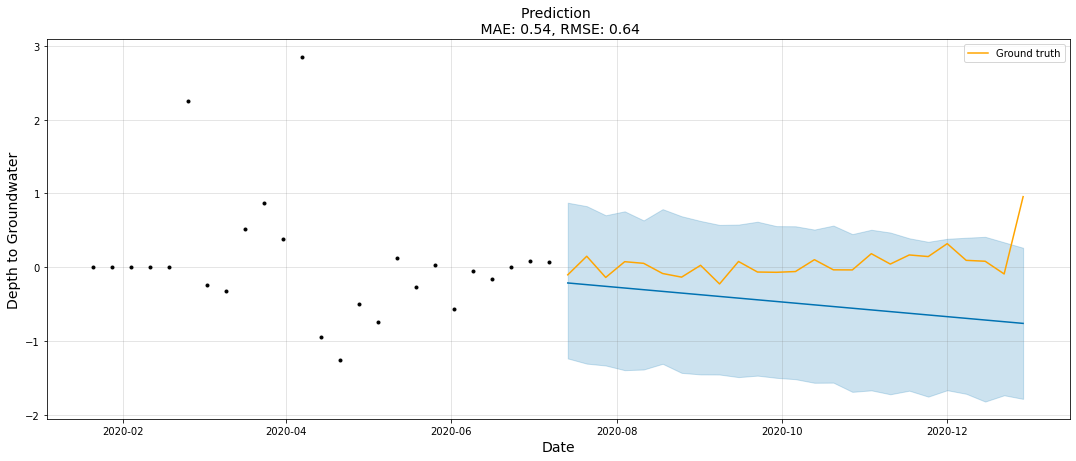

In [62]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Cases', fontsize=14)

plt.show()

In [64]:
from statsmodels.tsa.arima_model import ARIMA

# Fit model
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

# Prediction with ARIMA
y_pred, se, conf = model_fit.forecast(25)

model.save('Forecast.h5')

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

RMSE: 0.6583997382893993


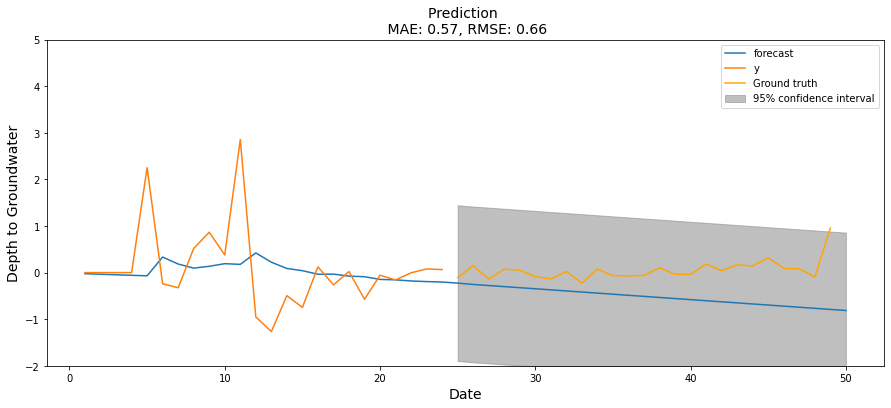

In [70]:
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model_fit.plot_predict(1, 50, ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Cases', fontsize=14)

ax.set_ylim(-2, 5)
plt.show()

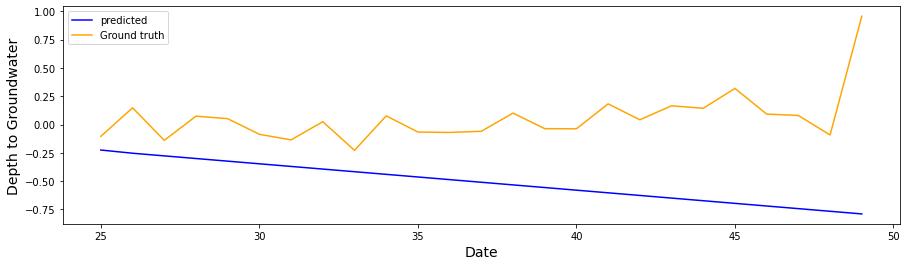

In [71]:
f, ax = plt.subplots(1)
f.set_figheight(4)
f.set_figwidth(15)

sns.lineplot(x=x_valid.index, y=y_pred, ax=ax, color='blue', label='predicted') #navajowhite
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Cases', fontsize=14)

plt.show()

# LSTM

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
scaler.fit(x_train)
scaled_train_data = scaler.transform(x_train)
scaled_test_data = scaler.transform(y_train)

In [74]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [76]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
13/13 [==============================] - 2s 7ms/step - loss: 0.3778
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0880
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.0110
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 9.0495e-04
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 4.2126e-04
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 1.8086e-04
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 8.7569e-05
Epoch 9/20
13/13 [==============================] - 0s 6ms/step - loss: 3.1961e-05
Epoch 10/20
13/13 [==============================] - 0s 6ms/step - loss: 4.3244e-05
Epoch 11/20
13/13 [==============================] - 0s 7ms/step - loss: 3.8613e-05
Epoch 12/20
13/13 [==============================] - 0s 7ms/step - loss: 4.0420e-05
Epoch 13/20
13/13

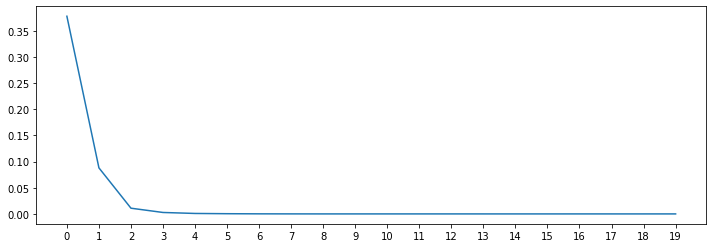

In [77]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [78]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(y_train)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [79]:
lstm_predictions_scaled

[array([1.0559821], dtype=float32),
 array([1.1051997], dtype=float32),
 array([1.156191], dtype=float32),
 array([1.209264], dtype=float32),
 array([1.2646354], dtype=float32),
 array([1.3226302], dtype=float32),
 array([1.3836887], dtype=float32),
 array([1.4482311], dtype=float32),
 array([1.5167581], dtype=float32),
 array([1.5898595], dtype=float32),
 array([1.6682849], dtype=float32),
 array([1.7528809], dtype=float32),
 array([1.8446103], dtype=float32),
 array([1.9437022], dtype=float32),
 array([2.052058], dtype=float32),
 array([2.1712976], dtype=float32),
 array([2.3033743], dtype=float32),
 array([2.4507573], dtype=float32),
 array([2.6165009], dtype=float32),
 array([2.8044615], dtype=float32),
 array([3.0196056], dtype=float32),
 array([3.2685268], dtype=float32),
 array([3.559688], dtype=float32),
 array([3.9045527], dtype=float32),
 array([4.318555], dtype=float32)]

In [80]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [81]:
lstm_predictions

array([[1.59489259e+18],
       [1.59560699e+18],
       [1.59634714e+18],
       [1.59711751e+18],
       [1.59792124e+18],
       [1.59876304e+18],
       [1.59964932e+18],
       [1.60058616e+18],
       [1.60158085e+18],
       [1.60264193e+18],
       [1.60378029e+18],
       [1.60500822e+18],
       [1.60633969e+18],
       [1.60777803e+18],
       [1.60935083e+18],
       [1.61108162e+18],
       [1.61299874e+18],
       [1.61513803e+18],
       [1.61754383e+18],
       [1.62027212e+18],
       [1.62339498e+18],
       [1.62700812e+18],
       [1.63123438e+18],
       [1.63624016e+18],
       [1.64224949e+18]])